# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [6]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [7]:
# 데이터 집합에 포함된 행과 열은 몇개입니까?
print(f"**data.shape:\n{data.shape}")

**data.shape:
(5391, 6)


In [8]:
# NaN값이 존재합니까?
print(f"**data.isna().values.any():\n{data.isna().values.any()}")
print(f"**data.isnull().sum():\n{data.isnull().sum()}")

**data.isna().values.any():
False
**data.isnull().sum():
Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64


In [9]:
# 중복되는 줄이 있습니까?
print(f"**data.duplicated().values.any():\n{data.duplicated().values.any()}\n끝")
print(f"**data.duplicated().sum():\n{data.duplicated().sum()}\n끝")

**data.duplicated().values.any():
False
끝
**data.duplicated().sum():
0
끝


In [10]:
# 각열의 데이터 유형은 무엇입니까?
print(f"**data.dtypes:\n{data.dtypes}\n끝")
print(f"{data.info()}")

**data.dtypes:
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object
끝
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB
None


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [12]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget',
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [13]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.head()

Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation                 110000   
1  5140   1916-05-09                     Intolerance                 385907   
2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
4  5222   1925-01-01                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  
0             11000000            10000000  
1                    0                   0  
2              8000000             8000000  
3              3000000             3000000  
4             22000000            11000000

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [15]:
data.describe()

Rank                   Release_Date  USD_Production_Budget  \
count 5,391.00                           5391               5,391.00   
mean  2,696.00  2003-09-19 15:02:02.203672704          31,113,737.58   
min       1.00            1915-08-02 00:00:00               1,100.00   
25%   1,348.50            1999-12-02 12:00:00           5,000,000.00   
50%   2,696.00            2006-06-23 00:00:00          17,000,000.00   
75%   4,043.50            2011-11-23 00:00:00          40,000,000.00   
max   5,391.00            2020-12-31 00:00:00         425,000,000.00   
std   1,556.39                            NaN          40,523,796.88   

       USD_Worldwide_Gross  USD_Domestic_Gross  
count             5,391.00            5,391.00  
mean         88,855,421.96       41,235,519.44  
min                   0.00                0.00  
25%           3,865,206.00        1,330,901.50  
50%          27,450,453.00       17,192,205.00  
75%          96,454,455.00       52,343,687.00  
max       2,783,918,982.00      936,662,225.00  
std         168,457,757.00       66,029,346.27

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [18]:
average_budget=data['USD_Production_Budget'].mean()
print("평균 제작 예산:", average_budget)

평균 제작 예산: 31113737.57837136


In [19]:
average_worldwide_gross = data['USD_Worldwide_Gross'].mean()
print("평균 전 세계 총 수익:", average_worldwide_gross)

평균 전 세계 총 수익: 88855421.96271564


In [20]:
min_worldwide_gross = data['USD_Worldwide_Gross'].min()
min_domestic_gross = data['USD_Domestic_Gross'].min()

print("최소 전 세계 매출:", min_worldwide_gross)
print("최소 국내 매출:", min_domestic_gross)

최소 전 세계 매출: 0
최소 국내 매출: 0


In [22]:
production_budget_25th = data['USD_Production_Budget'].quantile(0.25)
worldwide_gross_25th = data['USD_Worldwide_Gross'].quantile(0.25)
domestic_gross_25th = data['USD_Domestic_Gross'].quantile(0.25)

# 수익 계산
worldwide_profit_25th = worldwide_gross_25th - production_budget_25th

domestic_profit_25th = domestic_gross_25th - production_budget_25th

# 전 세계 수익 비교
if worldwide_profit_25th > 0:
    print("하위 25% 영화는 전 세계적으로 수익이 납니다.")
else:
    print("하위 25% 영화는 전 세계적으로 손해를 봅니다.")

# 국내 수익 비교
if domestic_profit_25th > 0:
    print("하위 25% 영화는 국내 수익이 납니다.")
else:
    print("하위 25% 영화는 국내 수익에서 손해를 봅니다.")

하위 25% 영화는 전 세계적으로 손해를 봅니다.
하위 25% 영화는 국내 수익에서 손해를 봅니다.


In [23]:
max_production_budget = data['USD_Production_Budget'].max()
max_worldwide_gross = data['USD_Worldwide_Gross'].max()

print(f"최고 제작 예산: {max_production_budget} USD")
print(f"최고 전 세계 총 수익: {max_worldwide_gross} USD")

최고 제작 예산: 425000000 USD
최고 전 세계 총 수익: 2783918982 USD


In [24]:
# 최저 예산 영화 수익
min_budget_row = data.loc[data['USD_Production_Budget'].idxmin()]
min_budget_film = min_budget_row['USD_Worldwide_Gross'] - min_budget_row['USD_Production_Budget']
# 최고 예산 영화 수익
max_budget_row= data.loc[data['USD_Production_Budget'].idxmax()]
max_budget_film = max_budget_row['USD_Worldwide_Gross'] - max_budget_row['USD_Production_Budget']

print(f"최저 예산 영화 수익: {min_budget_film} USD")
print(f"최고 예산 영화 수익: {max_budget_film} USD")

Rank                                    5391
Release_Date             2005-05-08 00:00:00
Movie_Title                My Date With Drew
USD_Production_Budget                   1100
USD_Worldwide_Gross                   181041
USD_Domestic_Gross                    181041
Name: 2427, dtype: object
최저 예산 영화 수익: 179941 USD
최고 예산 영화 수익: 2358918982 USD


In [25]:
data[data.USD_Production_Budget == 1100.00]

Rank Release_Date        Movie_Title  USD_Production_Budget  \
2427  5391   2005-05-08  My Date With Drew                   1100   

      USD_Worldwide_Gross  USD_Domestic_Gross  
2427               181041              181041

In [27]:
data[data.USD_Production_Budget == 425000000]

Rank Release_Date Movie_Title  USD_Production_Budget  \
3529     1   2009-12-18      Avatar              425000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
3529           2783918982           760507625

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [28]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'0달러 수입 갯수 {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512


Rank Release_Date                         Movie_Title  \
5388    96   2020-12-31                         Singularity   
5387   126   2018-12-18                             Aquaman   
5384   321   2018-09-03                   A Wrinkle in Time   
5385   366   2018-10-08                      Amusement Park   
5090   556   2015-12-31  Don Gato, el inicio de la pandilla   
...    ...          ...                                 ...   
4787  5371   2014-12-31                Stories of Our Lives   
3056  5374   2007-12-31                         Tin Can Man   
4907  5381   2015-05-19                    Family Motocross   
5006  5389   2015-09-29             Signed Sealed Delivered   
5007  5390   2015-09-29                A Plague So Pleasant   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5388              175000000                    0                   0  
5387              160000000                    0                   0  
5384              103000000                    0                   0  
5385              100000000                    0                   0  
5090               80000000              4547660                   0  
...                     ...                  ...                 ...  
4787                  15000                    0                   0  
3056                  12000                    0                   0  
4907                  10000                    0                   0  
5006                   5000                    0                   0  
5007                   1400                    0                   0  

[512 rows x 6 columns]

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [30]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f"0 달러 수입 갯수 {len(zero_worldwide)}")
zero_worldwide.sort_values("USD_Production_Budget", ascending=False)

0 달러 수입 갯수 357


Rank Release_Date              Movie_Title  USD_Production_Budget  \
5388    96   2020-12-31              Singularity              175000000   
5387   126   2018-12-18                  Aquaman              160000000   
5384   321   2018-09-03        A Wrinkle in Time              103000000   
5385   366   2018-10-08           Amusement Park              100000000   
5058   880   2015-11-12         The Ridiculous 6               60000000   
...    ...          ...                      ...                    ...   
4787  5371   2014-12-31     Stories of Our Lives                  15000   
3056  5374   2007-12-31              Tin Can Man                  12000   
4907  5381   2015-05-19         Family Motocross                  10000   
5006  5389   2015-09-29  Signed Sealed Delivered                   5000   
5007  5390   2015-09-29     A Plague So Pleasant                   1400   

      USD_Worldwide_Gross  USD_Domestic_Gross  
5388                    0                   0  
5387                    0                   0  
5384                    0                   0  
5385                    0                   0  
5058                    0                   0  
...                   ...                 ...  
4787                    0                   0  
3056                    0                   0  
4907                    0                   0  
5006                    0                   0  
5007                    0                   0  

[357 rows x 6 columns]

### Filtering on Multiple Conditions

In [31]:
international_release = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(international_release)

      Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert               36000000   
5348  2225   2017-05-05        Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03                Departure                1100000   
5372  1856   2017-08-25                Ballerina               30000000   
5374  4237   2017-08-25     Polina danser sa vie                4000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3220                   0  
157

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [32]:
international_release = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross !=0')
print(international_release)

      Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert               36000000   
5348  2225   2017-05-05        Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03                Departure                1100000   
5372  1856   2017-08-25                Ballerina               30000000   
5374  4237   2017-08-25     Polina danser sa vie                4000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3220                   0  
157

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [33]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [34]:
future_release = data[data.Release_Date >= scrape_date]
print(f"unleassed movies: {len(future_release)}")
print(future_release)

unleassed movies: 7
      Rank Release_Date                     Movie_Title  \
5384   321   2018-09-03               A Wrinkle in Time   
5385   366   2018-10-08                  Amusement Park   
5386  2950   2018-10-08                             Meg   
5387   126   2018-12-18                         Aquaman   
5388    96   2020-12-31                     Singularity   
5389  1119   2020-12-31          Hannibal the Conqueror   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5384              103000000                    0                   0  
5385              100000000                    0                   0  
5386               15000000                    0                   0  
5387              160000000                    0                   0  
5388              175000000                    0                   0  
5389               50000000                    0                   0  
5390      

In [35]:
# 개봉되지 않은 영화 삭제
data_clean = data.drop(future_release.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [40]:
# 매출보다 큰 예산을 쓴 영화들
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
# 갯수
print(money_losing.shape[0])
print(data_clean.shape[0])

# 비율
print(money_losing.shape[0]/data_clean.shape[0])

2007
5384
0.37277117384843983


# Seaborn for Data Viz: Bubble Charts

In [43]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

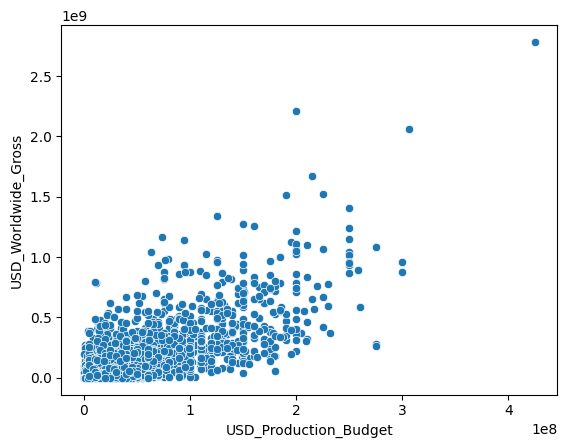

In [44]:
# SeaBorn으로 그래프 그리기
sns.scatterplot(data = data_clean,
                x = 'USD_Production_Budget',
                y = 'USD_Worldwide_Gross')

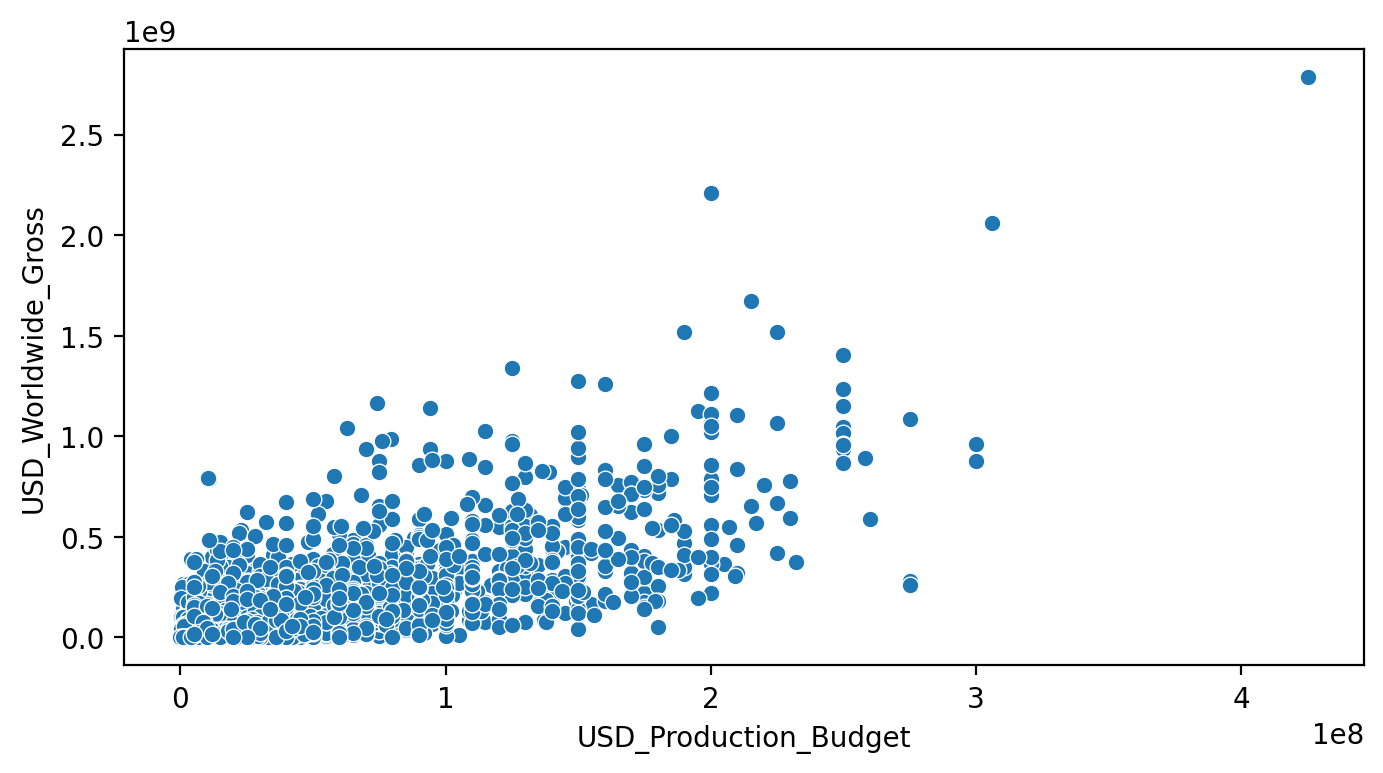

In [45]:
#멧플로립을 가져와서 그래프 크기 변경하기
plt.figure(figsize=(8,4), dpi=200)

sns.scatterplot(data = data_clean,
                x = 'USD_Production_Budget',
                y = 'USD_Worldwide_Gross')

plt.show()

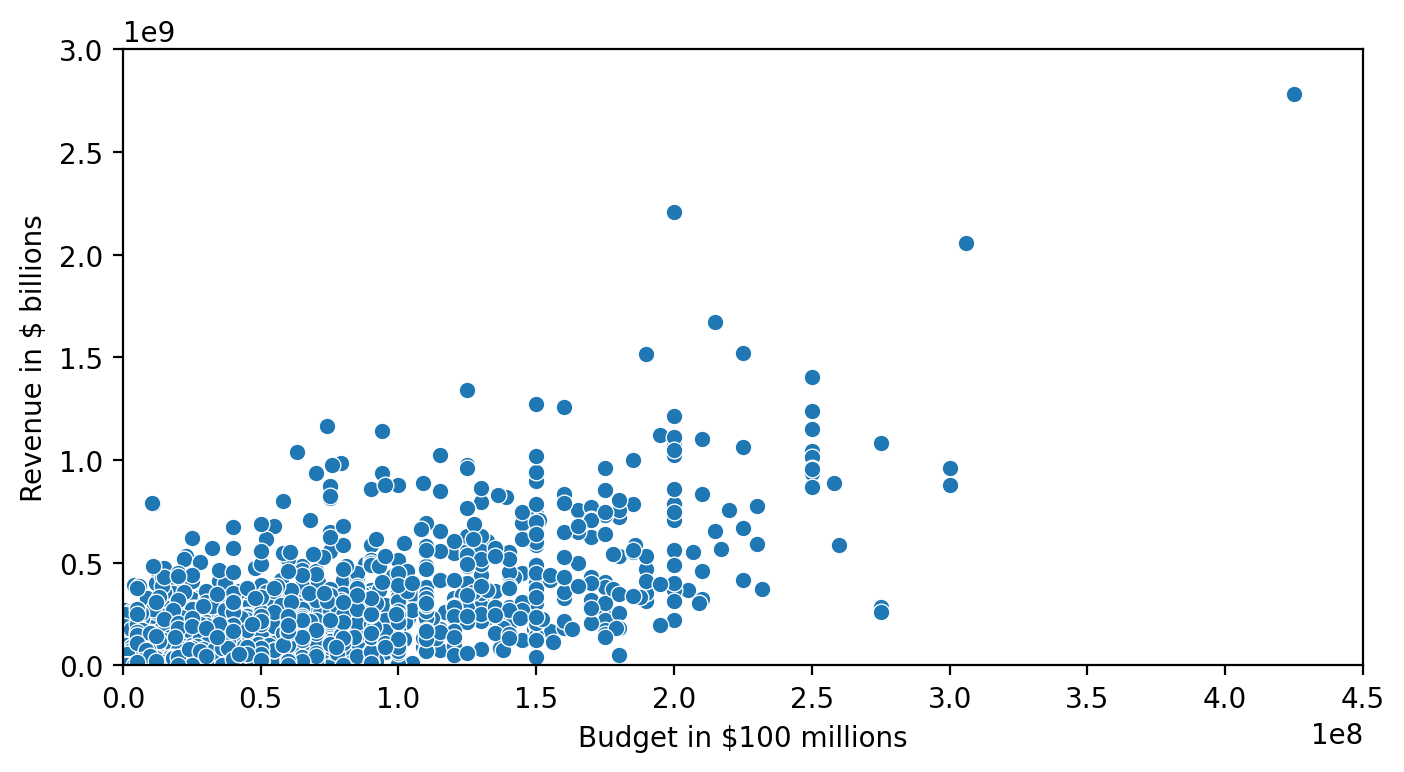

In [46]:
# 차트에 스타일 지정
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data = data_clean,
                x = 'USD_Production_Budget',
                y = 'USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

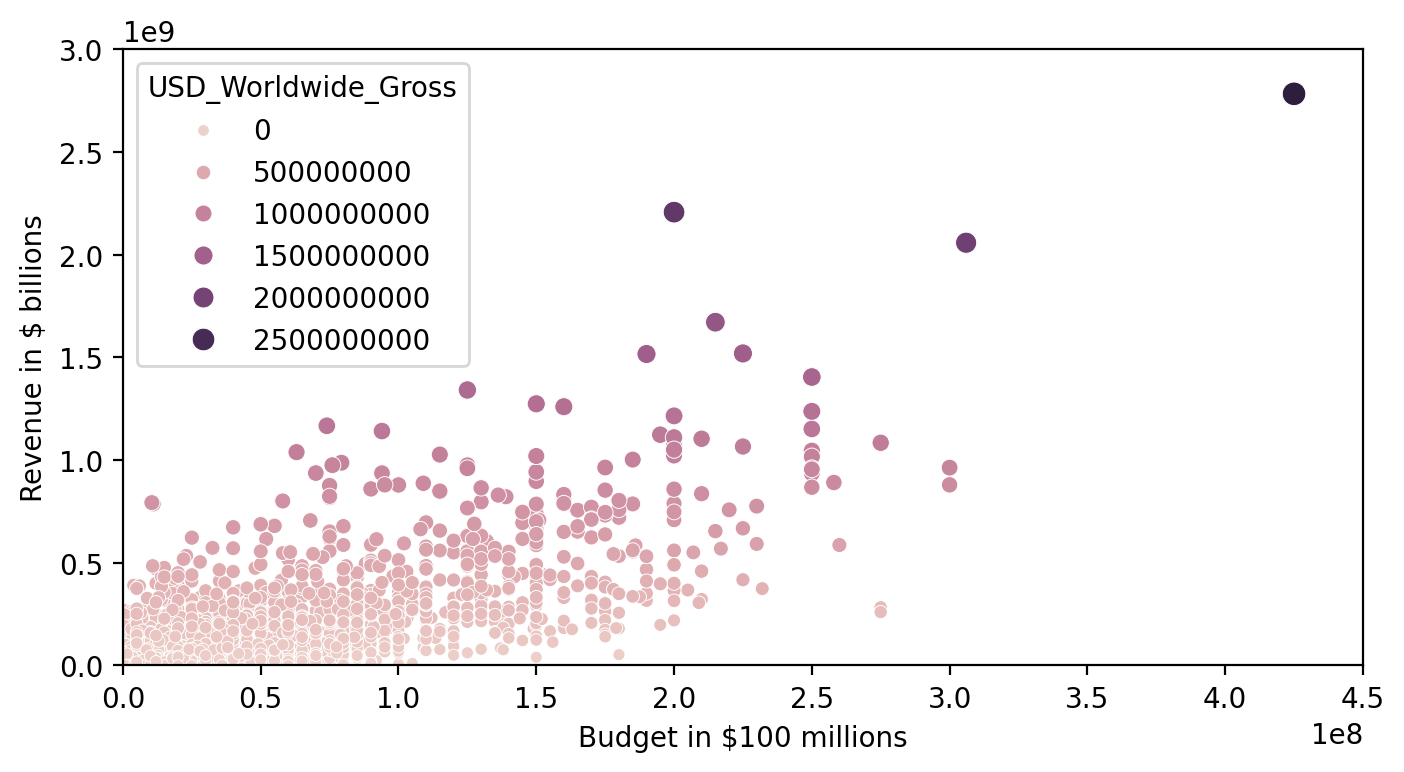

In [47]:
plt.figure(figsize=(8,4), dpi=200)

# 부분 색깔과 점 크기 변경
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

plt.show()

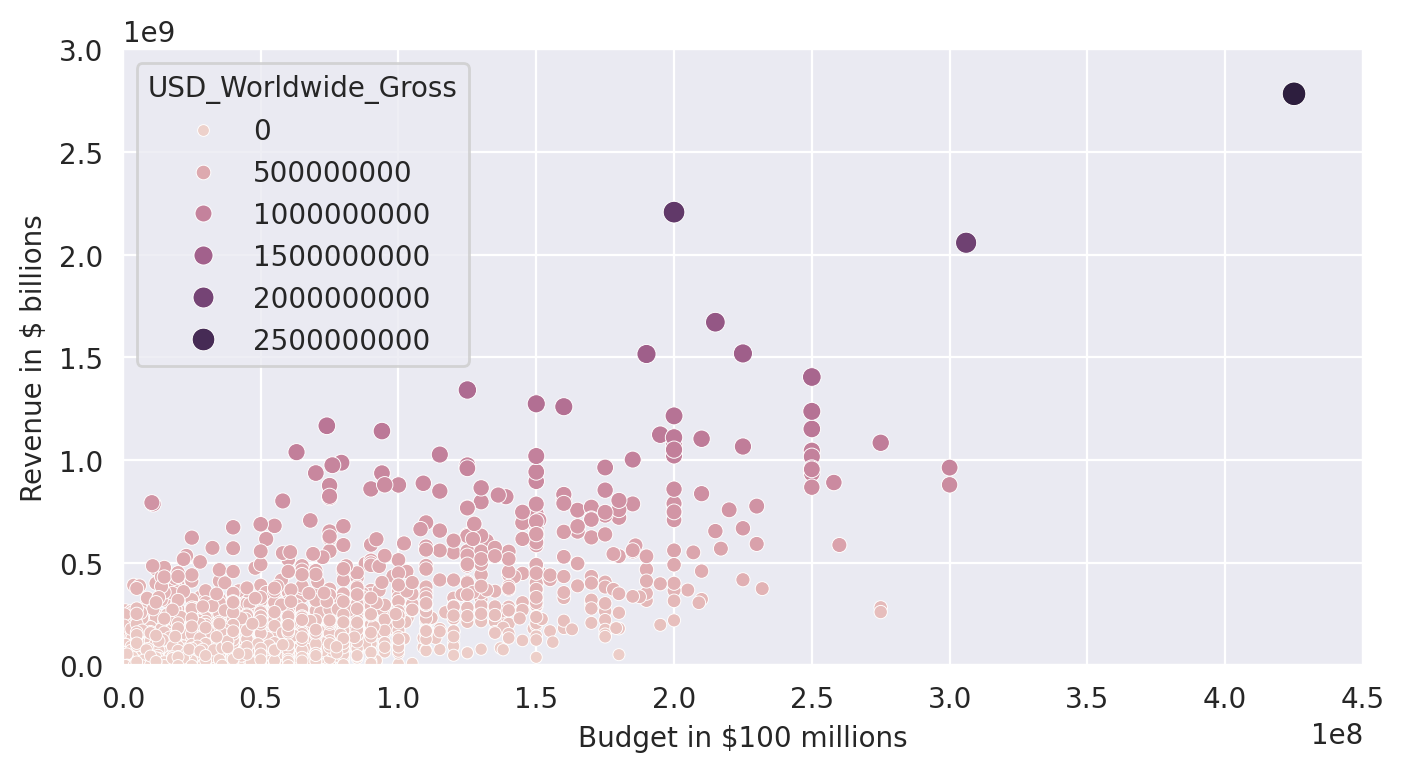

In [48]:
plt.figure(figsize=(8,4), dpi=200)

# 단일 차트 적용하려면 With 키워드를 사용
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

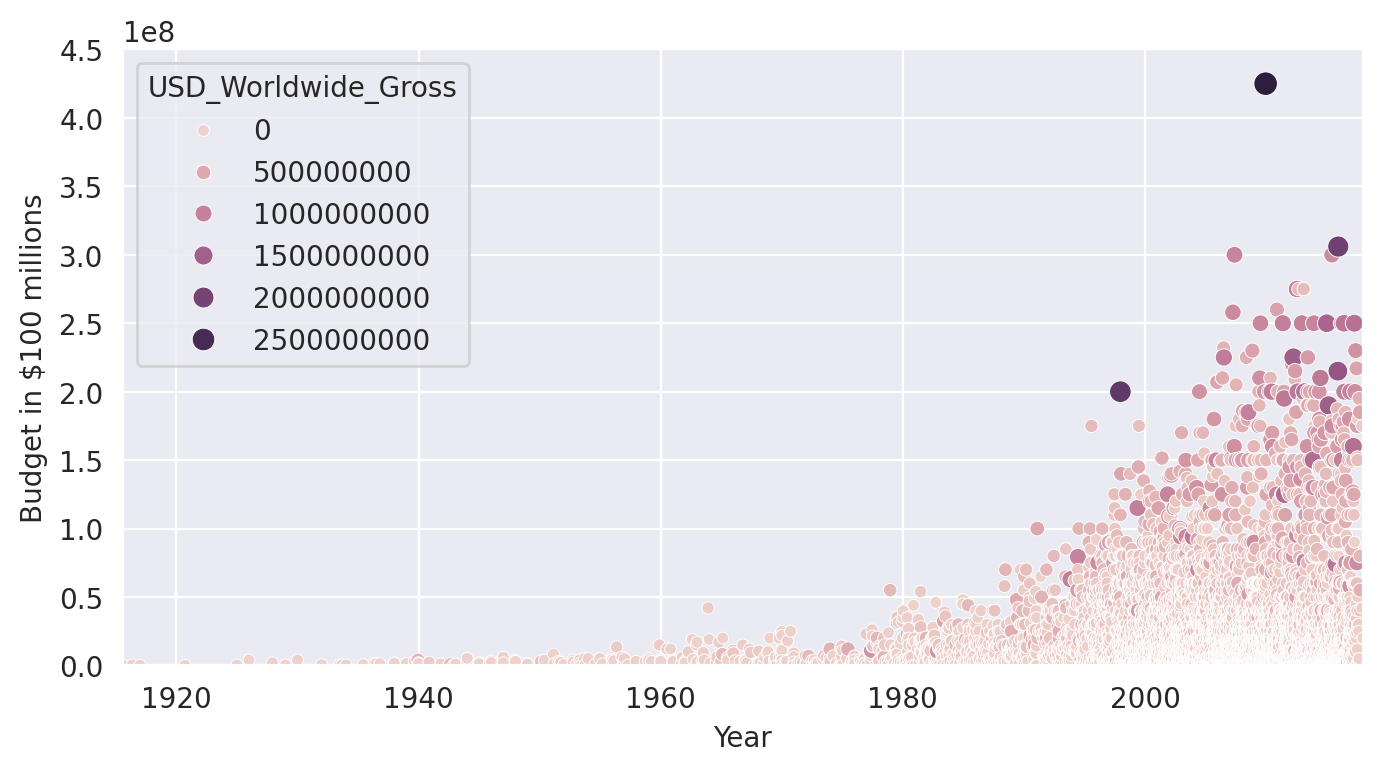

In [49]:
# 시간별 영화 예산
# 출시일 전세계 매출 3개의 측면
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                         x='Release_Date',
                         y='USD_Production_Budget',
                         hue='USD_Worldwide_Gross',
                         size='USD_Worldwide_Gross')

    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions',)

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [57]:
# 연도를 10년 단위로 변환하기
## 1. DatetimeIndex 객체 만들기
dt_index = pd.DatetimeIndex(data_clean["Release_Date"])
print(dt_index)
## 2. .year 속성을 통해 datetime의 모든 index를 가져오자
years = dt_index.year
print(years)
## 3. 정수 나눗셈을 통해서 10년 단위로 바꿔준다.
decades = years//10 *10
print(decades)
## 4. 10년 단위로 묶인 Decade 열을 data_clean 데이터프레임에 넣는다.
data_clean["Decade"] = decades
print(data_clean)

DatetimeIndex(['1915-08-02', '1916-05-09', '1916-12-24', '1920-09-17',
               '1925-01-01', '1925-12-30', '1927-12-08', '1929-01-02',
               '1930-01-01', '1931-12-31',
               ...
               '2017-08-25', '2017-09-06', '2017-09-06', '2017-10-02',
               '2017-10-02', '2017-10-02', '2017-10-03', '2017-12-05',
               '2017-12-05', '2017-12-31'],
              dtype='datetime64[ns]', name='Release_Date', length=5384, freq=None)
Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Release_Date', length=5384)
Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
       ...
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='Release_Date', length=5384)
      Rank Release_Date                       Movie_Title  \
0     5293   1915-08-02             The Birth of a Nation   
1  

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [70]:
# old_films 만들기
old_films = data_clean[data_clean['Decade'] <= 1960]
# new_films 만들기
new_films = data_clean[data_clean['Decade'] >= 1970]
# old films 153개
old_films.describe()

Rank                   Release_Date  USD_Production_Budget  \
count   153.00                            153                 153.00   
mean  4,274.77  1954-06-10 04:04:42.352941184           4,611,297.65   
min   1,253.00            1915-08-02 00:00:00             100,000.00   
25%   3,973.00            1946-01-01 00:00:00           1,250,000.00   
50%   4,434.00            1956-12-23 00:00:00           2,900,000.00   
75%   4,785.00            1964-10-22 00:00:00           5,000,000.00   
max   5,299.00            1969-12-19 00:00:00          42,000,000.00   
std     742.14                            NaN           5,713,648.85   

       USD_Worldwide_Gross  USD_Domestic_Gross   Decade  
count               153.00              153.00   153.00  
mean         30,419,634.38       22,389,473.87 1,949.15  
min                   0.00                0.00 1,910.00  
25%           5,273,000.00        5,000,000.00 1,940.00  
50%          10,000,000.00       10,000,000.00 1,950.00  
75%          33,208,099.00       28,350,000.00 1,960.00  
max         390,525,192.00      198,680,470.00 1,960.00  
std          54,931,828.93       32,641,752.41    12.72

In [71]:
# 1970년 이전 영화 개수
num_old_films = len(old_films)
print(f"Number of films released before 1970: {num_old_films}")

Number of films released before 1970: 153


In [73]:
old_films.sort_values('USD_Production_Budget', ascending=False)

Rank Release_Date                     Movie_Title  USD_Production_Budget  \
109  1253   1963-12-06                       Cleopatra               42000000   
150  2175   1969-12-16                    Hello, Dolly               24000000   
118  2425   1965-02-15    The Greatest Story Ever Told               20000000   
143  2465   1969-01-01                   Sweet Charity               20000000   
148  2375   1969-10-15                Paint Your Wagon               20000000   
..    ...          ...                             ...                    ...   
2    5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
29   5283   1942-11-16                      Cat People                 134000   
135  5292   1968-01-10        Night of the Living Dead                 114000   
0    5293   1915-08-02           The Birth of a Nation                 110000   
3    5299   1920-09-17  Over the Hill to the Poorhouse                 100000   

     USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
109             71000000            57000000    1960  
150             33208099            33208099    1960  
118             15473333            15473333    1960  
143              8000000             8000000    1960  
148             31678778            31678778    1960  
..                   ...                 ...     ...  
2                8000000             8000000    1910  
29               8000000             4000000    1940  
135             30000000            12000000    1960  
0               11000000            10000000    1910  
3                3000000             3000000    1920  

[153 rows x 7 columns]

In [72]:
# 가장 비싼 영화의 csv 파일 행의 값 모두 구하기
most_expensive_old_film = old_films.loc[old_films["USD_Production_Budget"].idxmax()]
print("Most expensive film made prior to 1970:")
print(most_expensive_old_film)

Most expensive film made prior to 1970:
Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
Decade                                  1960
Name: 109, dtype: object


In [74]:
# 가장 비싼 영화의 이름만 추출
most_expensive_old_film_title = old_films.loc[old_films["USD_Production_Budget"].idxmax(), "Movie_Title"]
print(f"The most expensive film made prior to 1970: {most_expensive_old_film_title}")

The most expensive film made prior to 1970: Cleopatra


# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

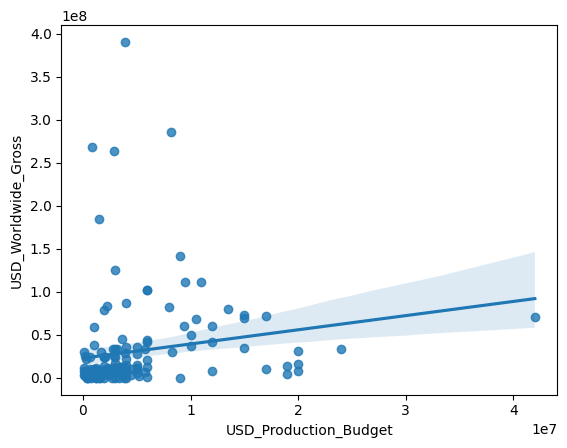

In [75]:
# old 영화 선형플롯 그리기
sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

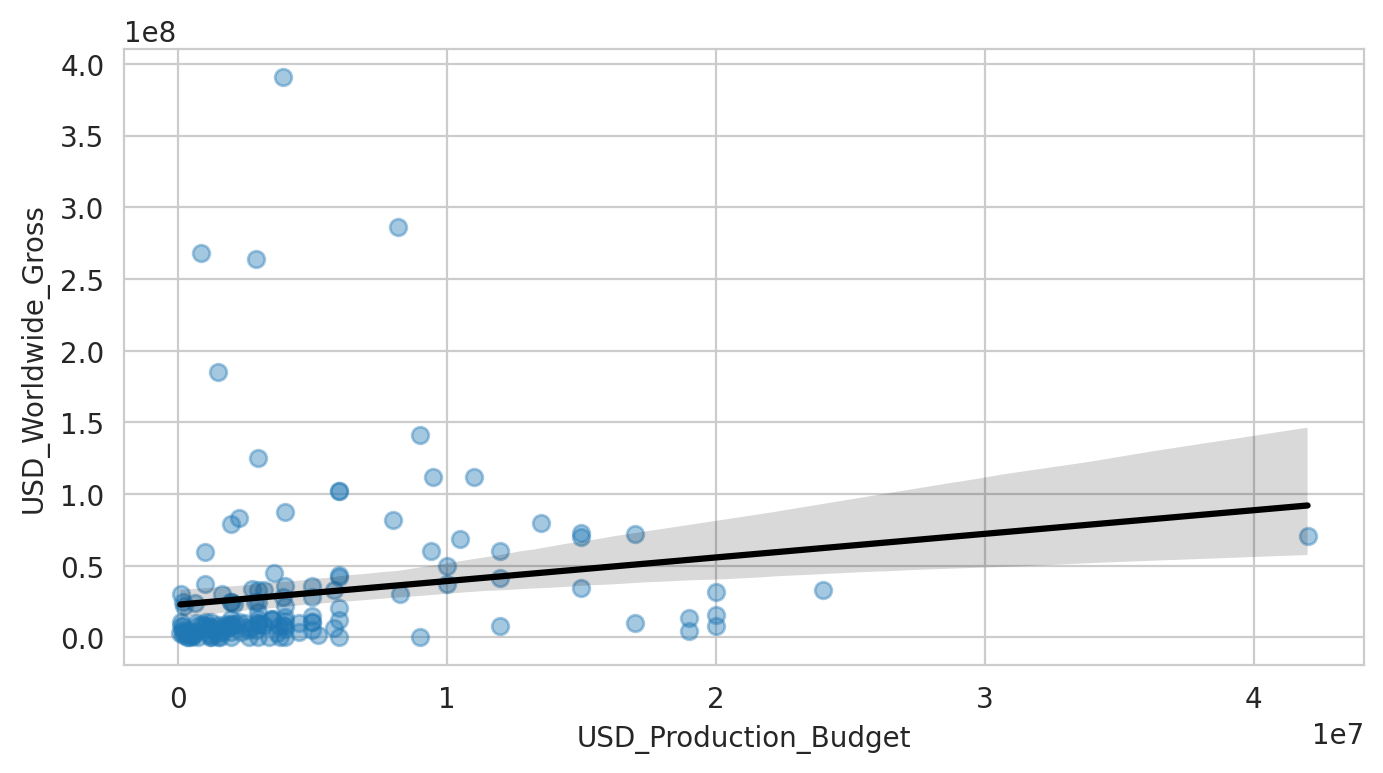

In [76]:
# 스타일 추가하기
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
    sns.regplot(data=old_films,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

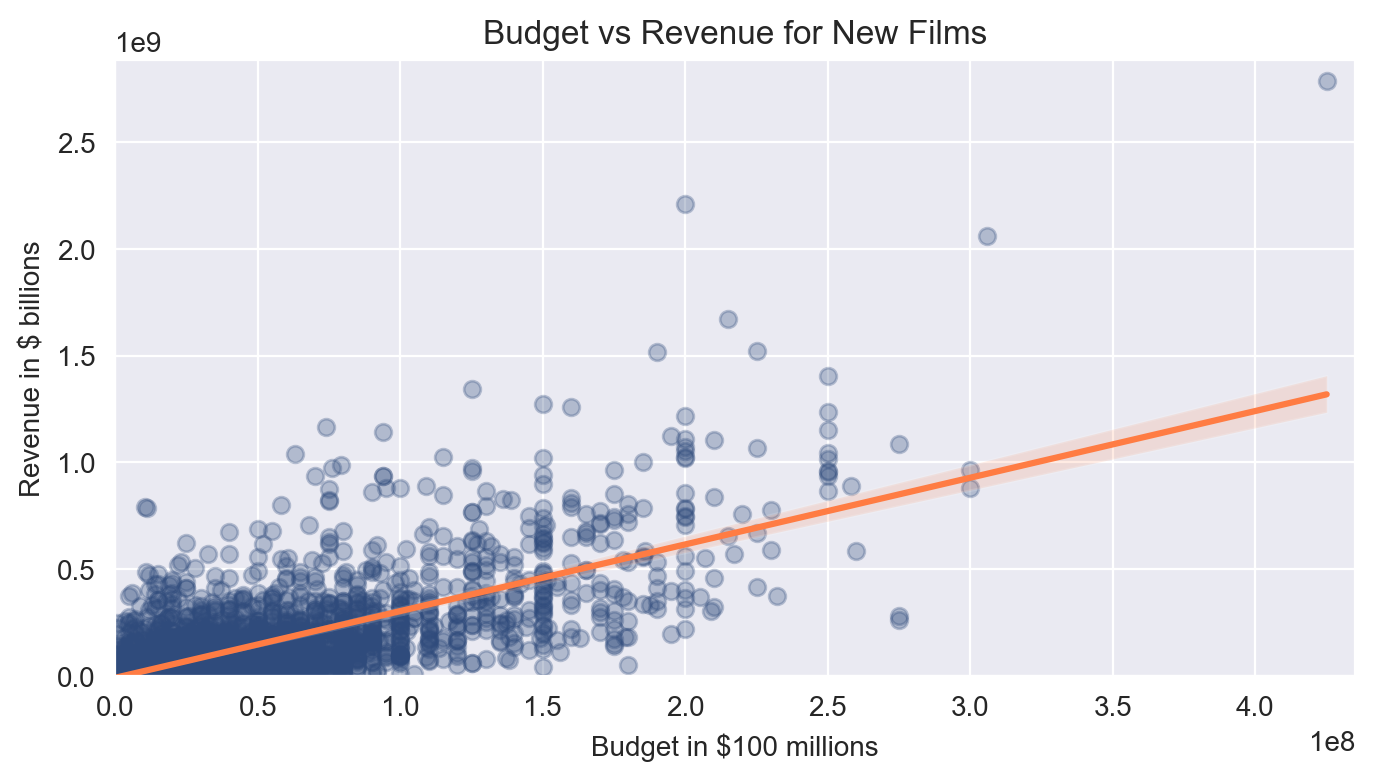

In [81]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    sns.regplot(data=new_films,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                scatter_kws={'color': '#2f4b7c', 'alpha': 0.3},  # 점 색상
                line_kws={'color': '#ff7c43'}  # 회귀선 색상
                )

    plt.xlim(0, new_films["USD_Production_Budget"].max() + 10_000_000)
    plt.ylim(0, new_films["USD_Worldwide_Gross"].max() + 100_000_000)

    plt.xlabel('Budget in $100 millions')
    plt.ylabel('Revenue in $ billions')

    plt.title("Budget vs Revenue for New Films")

    plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [82]:
from sklearn.linear_model import LinearRegression

In [116]:
## LinearRegression 객체 만들기
regression = LinearRegression()

In [132]:
## 반응 변수 정해주기
# Explanatory Variable(s) or Feature(s)
x = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])


In [129]:
## 회귀분석 하기
regression.fit(x, y)
## y 절편 값 구하기
regression.intercept_

array([-8650768.00661042])

In [128]:
# y 기울기 1달러당 얻는 수익 3.12
regression.coef_

array([[3.12259592]])

In [127]:
# R제곱 : 적합도를 구하기 얼마나 모형이 적합한지를 판단하는 척도
regression.score(x,y)
# 57% 정도의 정확도

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [110]:
regression_new = LinearRegression()

In [112]:
## (1) 반응 변수 구하기

old_x = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

old_y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [122]:
## (2) 회귀 분석하기
regression_new.fit(old_x, old_y)

LinearRegression()

In [125]:
## (3) y 절편 구하기
regression_new.intercept_

array([22821538.63508039])

In [124]:
## (4) y 기울기 구하기
regression_new.coef_

array([[1.64771314]])

In [126]:
## (5) R제곱 적합도 구하기
regression_new.score(old_x, old_y)
# 2.9% 정도의 정확도

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [130]:
## 절편과 기울기를 직접 활용해서 구함
# 절편과 기울기
intercept = regression.intercept_[0]  # y절편
coef = regression.coef_[0, 0]         # 기울기

# 예산
budget = 350000000

# 예상 수익 계산
revenue_estimate = intercept + coef * budget
print(f'예상 수익: ${revenue_estimate:,.2f}')

예상 수익: $1,084,257,803.06


In [135]:
## Predict를 사용해서 구함
# Pandas DataFrame으로 입력 데이터를 준비
budget_data = pd.DataFrame([[350000000]], columns=['USD_Production_Budget'])

# 예상 수익 계산
revenue_estimate = regression.predict(budget_data)
print(f'예상 수익: ${revenue_estimate[0, 0]:,.2f}')

예상 수익: $1,084,257,803.06


In [134]:
## 라운드 사용해서 출력

budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0, 0] * budget
revenue_estimate = round(revenue_estimate, -6)  # 백만 단위로 반올림
print(f'The estimated revenue for a $350M film is around ${revenue_estimate:.10}')


The estimated revenue for a $350M film is around $1.084e+09
